In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout,BatchNormalization
import numpy as np 
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
import os

filenames=os.listdir("D:/DeepLearning/CNN/Cat_Dog Recog_VGG/data/traindata/train")
categories=[]

for filename in filenames:
    category=filename.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})
df.tail()


,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


<AxesSubplot:>

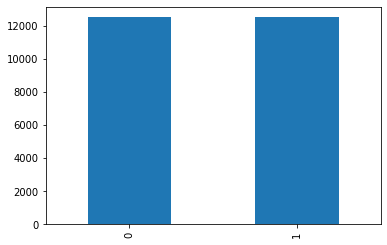

In [4]:
df['category'].value_counts().plot.bar()

<AxesSubplot:>

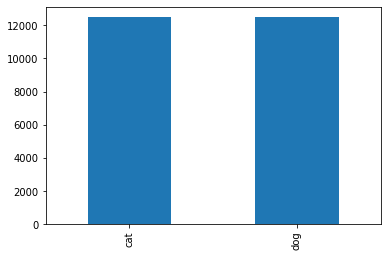

In [5]:
# prepare final data set

df['category']=df['category'].replace({
    0:'cat',
    1:'dog'
})
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

train_df,validate_df=train_test_split(df,test_size=0.20,random_state=45,shuffle=True)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

df['category'].value_counts().plot.bar()

In [6]:
train_total=train_df.shape[0]
validate_total=validate_df.shape[0]
batch_size=45

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    rescale=1./255, 
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.20
)
train_generator=train_datagen.flow_from_dataframe(
    train_df,
    "data/traindata/train/", 
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=batch_size
)

In [ ]:
# validation data prep
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "data/traindata/train/", 
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


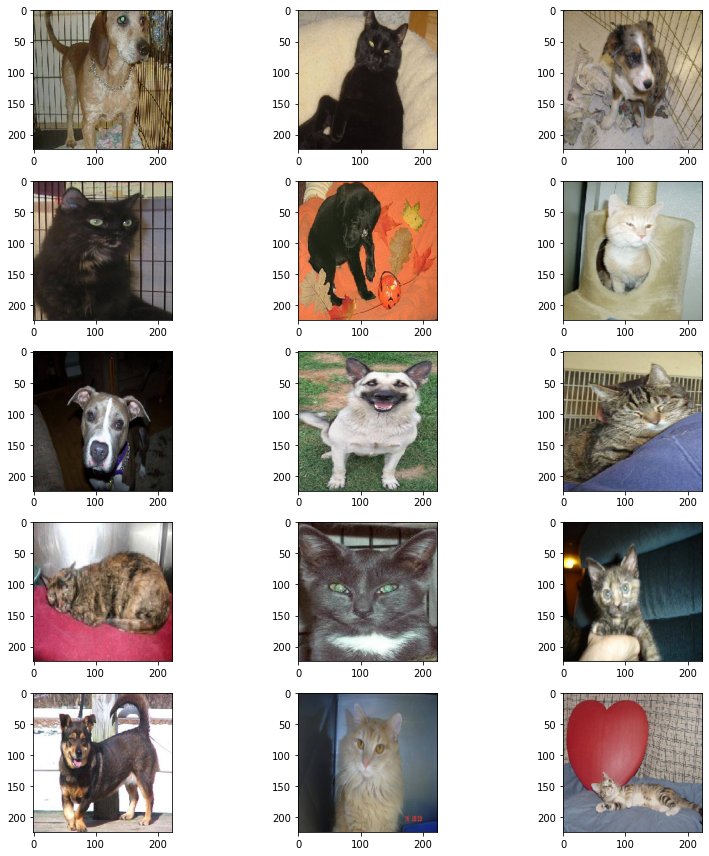

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in validation_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
# define call backs 
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=20)
# reduce the learn rate if ccuracy is not increasedd in two steps
lear_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)
callbacks = [earlystop, lear_rate_reduction]

In [ ]:
# vgg-16 network

model=Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2),pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2),pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2),pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2),pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2),pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1000,activation="relu"))
## as out puts can be of two types
model.add(Dense(units=2,activation="softmax"))
model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping


# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
# ModelCheckpoint helps us to save the model by monitoring a specific parameter of the model. In this case we are monitoring validation accuracy by passing val_acc to ModelCheckpoint. The model will only be saved to disk if the validation accuracy of the model in current epoch is greater than what it was in the last epoch.

# early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
# here patience is set to 20 means if accuracy is not increamenting after 20 epochs, exit from training.

# hist = model.fit_generator(steps_per_epoch=tr_data_dir_iterator.n//tr_data_dir_iterator.batch_size,generator=tr_data_dir_iterator, validation_data= valid_data_dir_iterator, validation_steps=valid_data_dir_iterator.n//valid_data_dir_iterator.batch_size,epochs=40,callbacks=[checkpoint,early])

# hist = model.fit_generator(steps_per_epoch=100,generator=tr_data_dir_iterator, validation_data= valid_data_dir_iterator, validation_steps=100,epochs=20)

# The validation generator works exactly like the training generator. You define how many batches it will wield per epoch.

# The training generator will yield steps_per_epoch batches.
# When the epoch ends, the validation generator will yield validation_steps batches.
# steps_per_epoch = TotalTrainingSamples / TrainingBatchSize
# validation_steps = TotalvalidationSamples / ValidationBatchSize
# https://stackoverflow.com/questions/45943675/meaning-of-validation-steps-in-keras-sequential-fit-generator-parameter-list

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
hist = model.fit_generator(
    steps_per_epoch=train_total//batch_size,
    generator=train_generator, 
    validation_data= validation_datagen, 
    validation_steps=validate_total//batch_size,
    epochs=20,
    callbacks=callbacks
    )
